In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 6
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.1
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[6_10_51_300_0.1_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[6_10_51_300_0.1_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	611.7569

Best Fitness:	608.1111
Solution:	600.0000
Diff:		8.1111

[0:01:14][----------] 1.96% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	612.6599

Best Fitness:	608.6327
Solution:	600.0000
Diff:		8.6327

[0:02:07][----------] 3.92% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	611.1614

Best Fitness:	607.1076
Solution:	600.0000
Diff:		7.1076

[0:03:06][#---------] 5.88% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	611.4494

Best Fitness:	607.5985
Solution:	600.0000
Diff:		7.5985

[0:03:53][#---------] 7.84% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	611.2148

Best Fitness:	607.5462
Solution:	600.0000
Diff:		7.5462

[0:04:50][#---------] 9.80% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	611.8920

Best Fitness:	607.2711
Solution:	600.0000
Diff:		7.2711

[0:05:34][#---------] 11.76% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	611.3193

Best Fitness:	607.0448
Solution:	600.0000
Diff:		7.0448

[0:06:24][#---------] 13.73% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	612.6504

Best Fitness:	609.7640
Solution:	600.0000
Diff:		9.7640

[0:07:30][##--------] 15.69% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	612.0881

Best Fitness:	607.5746
Solution:	600.0000
Diff:		7.5746

[0:08:13][##--------] 17.65% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	611.6386

Best Fitness:	607.4842
Solution:	600.0000
Diff:		7.4842

[0:08:57][##--------] 19.61% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	611.7792

Best Fitness:	608.5569
Solution:	600.0000
Diff:		8.5569

[0:09:42][##--------] 21.57% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	611.1474

Best Fitness:	607.6379
Solution:	600.0000
Diff:		7.6379

[0:10:22][##--------] 23.53% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	610.6971

Best Fitness:	607.5917
Solution:	600.0000
Diff:		7.5917

[0:11:04][###-------] 25.49% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	611.2609

Best Fitness:	607.5169
Solution:	600.0000
Diff:		7.5169

[0:11:48][###-------] 27.45% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	610.6862

Best Fitness:	607.0847
Solution:	600.0000
Diff:		7.0847

[0:12:28][###-------] 29.41% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	612.0083

Best Fitness:	607.1516
Solution:	600.0000
Diff:		7.1516

[0:13:08][###-------] 31.37% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	611.2424

Best Fitness:	608.2082
Solution:	600.0000
Diff:		8.2082

[0:13:45][###-------] 33.33% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	610.6623

Best Fitness:	607.4979
Solution:	600.0000
Diff:		7.4979

[0:14:32][####------] 35.29% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	610.9504

Best Fitness:	607.5291
Solution:	600.0000
Diff:		7.5291

[0:15:23][####------] 37.25% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	612.3815

Best Fitness:	608.6138
Solution:	600.0000
Diff:		8.6138

[0:16:01][####------] 39.22% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	611.7122

Best Fitness:	607.7975
Solution:	600.0000
Diff:		7.7975

[0:16:36][####------] 41.18% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	611.3646

Best Fitness:	607.4835
Solution:	600.0000
Diff:		7.4835

[0:17:11][####------] 43.14% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	612.6684

Best Fitness:	609.4398
Solution:	600.0000
Diff:		9.4398

[0:17:50][#####-----] 45.10% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	611.1593

Best Fitness:	606.6755
Solution:	600.0000
Diff:		6.6755

[0:18:24][#####-----] 47.06% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	611.4488

Best Fitness:	607.2926
Solution:	600.0000
Diff:		7.2926

[0:19:06][#####-----] 49.02% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	611.5183

Best Fitness:	606.6985
Solution:	600.0000
Diff:		6.6985

[0:19:42][#####-----] 50.98% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	611.4324

Best Fitness:	607.5323
Solution:	600.0000
Diff:		7.5323

[0:20:34][#####-----] 52.94% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	609.9099

Best Fitness:	605.9054
Solution:	600.0000
Diff:		5.9054

[0:21:16][#####-----] 54.90% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	611.3678

Best Fitness:	607.5943
Solution:	600.0000
Diff:		7.5943

[0:21:57][######----] 56.86% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	612.2940

Best Fitness:	608.0107
Solution:	600.0000
Diff:		8.0107

[0:22:41][######----] 58.82% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	610.8928

Best Fitness:	607.9755
Solution:	600.0000
Diff:		7.9755

[0:23:30][######----] 60.78% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	610.9520

Best Fitness:	607.3900
Solution:	600.0000
Diff:		7.3900

[0:24:04][######----] 62.75% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	612.1319

Best Fitness:	608.0439
Solution:	600.0000
Diff:		8.0439

[0:25:03][######----] 64.71% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	611.6056

Best Fitness:	608.6139
Solution:	600.0000
Diff:		8.6139

[0:25:45][#######---] 66.67% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	611.3092

Best Fitness:	607.4182
Solution:	600.0000
Diff:		7.4182

[0:26:25][#######---] 68.63% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	610.9132

Best Fitness:	607.9709
Solution:	600.0000
Diff:		7.9709

[0:27:05][#######---] 70.59% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	611.6825

Best Fitness:	607.2623
Solution:	600.0000
Diff:		7.2623

[0:27:53][#######---] 72.55% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	611.8996

Best Fitness:	608.5684
Solution:	600.0000
Diff:		8.5684

[0:28:38][#######---] 74.51% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	611.4635

Best Fitness:	607.7521
Solution:	600.0000
Diff:		7.7521

[0:29:21][########--] 76.47% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	611.3167

Best Fitness:	607.6892
Solution:	600.0000
Diff:		7.6892

[0:30:06][########--] 78.43% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	609.5941

Best Fitness:	605.1495
Solution:	600.0000
Diff:		5.1495

[0:30:53][########--] 80.39% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	611.8283

Best Fitness:	608.2323
Solution:	600.0000
Diff:		8.2323

[0:31:38][########--] 82.35% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	611.2216

Best Fitness:	607.1730
Solution:	600.0000
Diff:		7.1730

[0:32:28][########--] 84.31% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	611.4297

Best Fitness:	608.0081
Solution:	600.0000
Diff:		8.0081

[0:33:13][#########-] 86.27% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	611.2767

Best Fitness:	606.5599
Solution:	600.0000
Diff:		6.5599

[0:34:04][#########-] 88.24% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	611.1717

Best Fitness:	608.0595
Solution:	600.0000
Diff:		8.0595

[0:34:57][#########-] 90.20% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	611.7855

Best Fitness:	607.8800
Solution:	600.0000
Diff:		7.8800

[0:35:42][#########-] 92.16% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	611.2811

Best Fitness:	607.6977
Solution:	600.0000
Diff:		7.6977

[0:36:34][#########-] 94.12% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	610.8808

Best Fitness:	607.0127
Solution:	600.0000
Diff:		7.0127

[0:37:11][##########] 96.08% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	612.4059

Best Fitness:	607.8639
Solution:	600.0000
Diff:		7.8639

[0:37:54][##########] 98.04% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	610.3854

Best Fitness:	605.5164
Solution:	600.0000
Diff:		5.5164

[0:38:49][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

0:38:49

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
27,12.017847,11.746755,8.308675,11.761743,10.498352,11.618122,12.598095,11.383275,9.750839,9.334243,...,8.249385,8.513585,11.787712,11.671558,11.697631,11.516044,11.912567,12.348428,9.863808,50
28,11.078226,11.746755,8.308675,11.761743,10.498352,11.618122,12.598095,11.383275,9.750839,9.334243,...,8.249385,8.513585,11.787712,11.671558,11.697631,11.516044,11.912567,12.348428,9.863808,50
29,11.078226,11.746755,8.308675,11.761743,10.498352,10.926949,12.598095,11.383275,9.750839,9.334243,...,8.249385,8.513585,11.787712,11.671558,10.789329,11.516044,11.912567,12.348428,9.863808,50
30,11.078226,11.746755,8.308675,11.761743,10.498352,10.926949,12.598095,11.383275,9.750839,9.334243,...,8.249385,8.513585,11.787712,11.477768,10.789329,11.516044,11.912567,12.348428,9.863808,50
31,11.078226,11.746755,8.308675,11.459105,10.498352,10.926949,12.598095,11.383275,9.750839,9.334243,...,8.249385,8.513585,11.787712,11.477768,10.208517,11.516044,11.912567,12.348428,9.863808,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 8.111091992460274

Best error for run 1: 8.632692133924365

Best error for run 2: 7.10756536062604

Best error for run 3: 7.598542198498649

Best error for run 4: 7.546192216043437

Best error for run 5: 7.271094657754475

Best error for run 6: 7.044803666419284

Best error for run 7: 9.763982610818289

Best error for run 8: 7.574645548580634

Best error for run 9: 7.48424940326629

Best error for run 10: 8.556879952957274

Best error for run 11: 7.637916085298571

Best error for run 12: 7.591735047083716

Best error for run 13: 7.516896259734381

Best error for run 14: 7.084656672351912

Best error for run 15: 7.151574214749644

Best error for run 16: 8.20818542048994

Best error for run 17: 7.497913711351998

Best error for run 18: 7.529126037486435

Best error for run 19: 8.6137914901459

Best error for run 20: 7.79747950988326

Best error for run 21: 7.483473905870596

Best error for run 22: 9.439825653664343

Best error for run 23: 6.675464922156266

Best error for run 24: 7.292642910079394

Best error for run 25: 6.698451885580084

Best error for run 26: 7.532343790722962

Best error for run 27: 5.905439431190871

Best error for run 28: 7.594258108699364

Best error for run 29: 8.010749673638657

Best error for run 30: 7.975518618769684

Best error for run 31: 7.389953967384486

Best error for run 32: 8.04388906039776

Best error for run 33: 8.613919981623667

Best error for run 34: 7.418182512652265

Best error for run 35: 7.970855324662011

Best error for run 36: 7.262318161717644

Best error for run 37: 8.568373358879057

Best error for run 38: 7.752075950543372

Best error for run 39: 7.689162146192643

Best error for run 40: 5.1495277862857165

Best error for run 41: 8.232312509901703

Best error for run 42: 7.1729616661028786

Best error for run 43: 8.008111312226902

Best error for run 44: 6.5599356340392205

Best error for run 45: 8.059477855152295

Best error for run 46: 7.880029606846392

Best error for run 47: 7.697736536017146

Best error for run 48: 7.012666312279293

Best error for run 49: 7.8638537543240545

Best error for run 50: 5.516425030624532

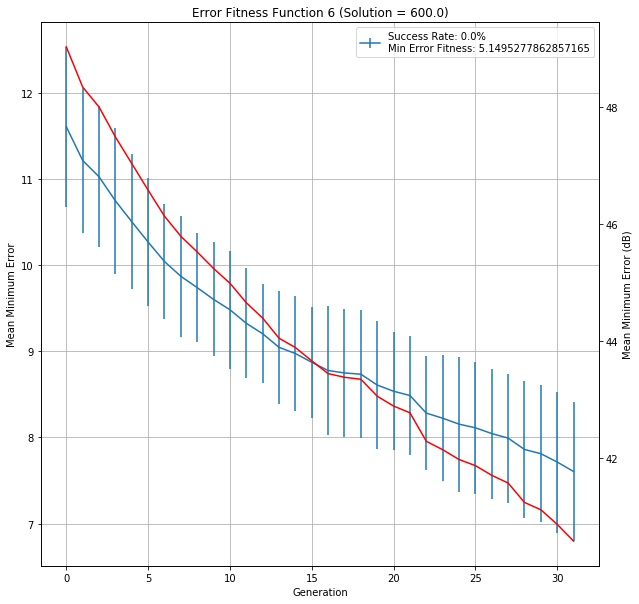

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[6_10_51_300_0.1_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,6,10,0.1,8.111092,8.632692,7.107565,7.598542,7.546192,7.271095,...,6.559936,8.059478,7.88003,7.697737,7.012666,7.863854,5.516425,7.603744,0:38:49,10200
